<a href="https://colab.research.google.com/github/fortune-max/M5-probability-and-statistics/blob/main/two_sample_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## TWO-SIDED TESTS

In this notebook you'll apply test you've learned about (and maybe even some other ones) to the data you worked with during the very first class - the famous Titanic dateset.

You'll need to come up with meaningful hypotheses and appropriate tests yourself - just like in real life :)

## Statistical tests in Python

Luckily, you won't need to implement any tests yourself - you can use readily available implememntations, for example, from the *scipy.stats* module. The full list of tests implemented with short summary and example is available in the official documentation:

https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests

There are of course way more tests listed there than we've seen during the class, but the basic principle of their work is always the same, so don't be afraid to try them out (don't forget to read about the assumptions made by the tests, of course).

If you need more detailed introduction, you can refer to, for instance, the following article:

https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

Of course, you can always google the tets you're interested in to find even more examples.

## Titanic

As you might remember, Titanic data contains information about 714 passengers on Titanic:

* **PassengerId** - passenger's ID;
* **Name** - passenger's name;
* **Sex** - passenger's sex (*male* or *female*);
* **Age** - passenger's age;
* **Pclass** - ticket class (1 = 1st 2 = 2nd, 3 = 3rd);
* **Fare** - ticket price;
* **Survived** - passenger's survival (0 = died, 1 = survived).

The code below loads the data into a data structure called DataFrame and displays the first couple of rows from it.

In [2]:
url = 'https://github.com/evgeniyako/datasets/raw/main/titanic.csv'
titanic = pd.read_csv(url)

In [3]:
# Showing the first 5 rows from the data
# (to show more, pass another number to the head() method
#  e.g., titanic.head(10))
titanic.head()

,PassengerId,Name,Sex,Age,Pclass,Fare,Survived
0,1,"Braund, Mr. Owen Harris",male,22.0,3,7.2500,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,71.2833,1
2,3,"Heikkinen, Miss. Laina",female,26.0,3,7.9250,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,53.1000,1
4,5,"Allen, Mr. William Henry",male,35.0,3,8.0500,0


## Ages: comparing two populations' means

As you might remember, during our exploratory data analysis, we noticed that the ages of the passengers look different acroos the classes. This is visible in the pivot table below:

In [4]:
pd.pivot_table(titanic, values='Age', index='Pclass')

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


But is there a statistically significant difference between the ages of the passengers in class 1, 2 and 3?

### Two-sample Student t-test

Let's start by test, for example, if the mean age in class 1 is *different* than that in class 2 with a **two-sample t-test** for comparing the means of two populations:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind

Formulate the null and alternative hypotheses, run the test and interpret the result.

Hypothesis 0: The mean age of passengers in 1st class is same as the mean age of passengers in 2nd class.

Hypothesis 1: The mean age of passengers in 1st class is different from mean age of passengers in 2nd class.

In [5]:
from scipy import stats

In [29]:
ages_ticket_1 = titanic.query('Pclass==1')['Age']
ages_ticket_2 = titanic.query('Pclass==2')['Age']
ages_ticket_3 = titanic.query('Pclass==3')['Age']

In [25]:
stat, p = stats.ttest_ind(ages_ticket_1, ages_ticket_2)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

7.835568991415144e-08
stat=5.485, p=0.000
Probably different distributions


Which assumptions about the data did you make? Are they realistic?

Assumption - Passenger age in class 1 and in class 2 come from normal distribution with the same unknown variance sigma.

H0 - Mean of ages in class 1 passengers normal distribution is equivalent to mean of ages of class 2 passengers normal distribution.

Read here about a non-parametric test that can be used to check if the data is coming from a normal distribution:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html#scipy.stats.normaltest

If you assumed that the data is normal at the previous step, check this. Does it hold?

<Axes: >

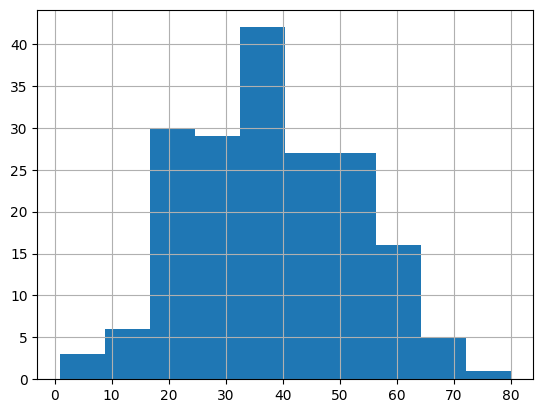

In [43]:
ages_ticket_1.hist()

<Axes: >

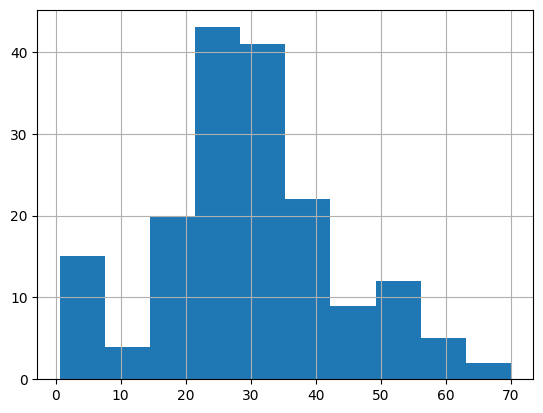

In [44]:
ages_ticket_2.hist()

<Axes: >

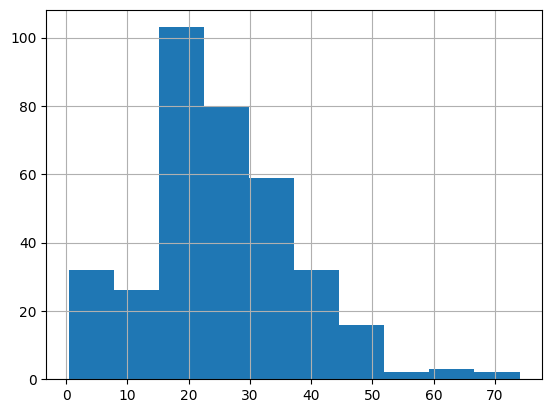

In [45]:
ages_ticket_3.hist()

In [35]:
# Your code here
print(stats.normaltest(ages_ticket_1))
print(stats.normaltest(ages_ticket_2))
print(stats.normaltest(ages_ticket_3))

# H0: Ages from ticket classes are from a normal distribution
# H1: They do not follow a normal dist.
# Retain null hypothesis for class 1 and 2. Reject for class 3.

NormaltestResult(statistic=1.6809586852884995, pvalue=0.4315036357542328)
NormaltestResult(statistic=1.1558018368785472, pvalue=0.561074873262309)
NormaltestResult(statistic=21.119072465384342, pvalue=2.5944880976350556e-05)


### Mann-Whitney U test: a non-parametric alernative for the two sample t-test

Remember that there was a non-parametric test which can be used as a non-parametric alternative of the two-sample Student t-test, namely **the Mann-Whitney test**.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html#scipy.stats.mannwhitneyu

What are the assumptions of that test?

[YOUR ANSWER]

Apply the test to the data about the ages of the passengers in class 1 and 2.

What are the null and alternative hypotheses?

[YOUR ANSWER]

In [40]:
# Your code here
stat, p = stats.mannwhitneyu(ages_ticket_1, ages_ticket_2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

stat=21091.500, p=0.000
Probably different distributions


How do you interpret the result?

[YOUR ANSWER]


## Survival: independence check

You might also remember that we concluded that from the data, it looks like women had a higher chance of surviving than men. You can see this in the following *contingency table*:

In [41]:
table = pd.crosstab(index=titanic['Sex'], columns=titanic['Survived'])
table

Survived,0,1
Sex,,
female,64,197
male,360,93


Remember the $\chi^2$-test that can be used to check if the two vaiables are independent based on such a contingency table:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

What ar ethe assumptions of the test?

[YOU ANSWER HERE]

Carefully formulate the null and alternative hypotheses and apply the test to the data.

[YOUR ANSWER]

In [46]:
 # Your code here
stats.chi2_contingency(table)

Chi2ContingencyResult(statistic=205.02582752855906, pvalue=1.6716678441395297e-46, dof=1, expected_freq=array([[154.99159664, 106.00840336],
       [269.00840336, 183.99159664]]))

Is there evidence strong enough that the chances of surviving weren't equal for male and female passengers?

[YOUR ANSWER]

## Your go: other tests

Now, it's your turn!

Formulate some hypotheses about the data and test them with an appropriate test.

For each test, check its assumptions and explain why you think it's applicable. Always carefully formulate the null and alternative hypotheses and interpret teh results of the test.


In [ ]:
# Your code here